In [228]:
import torch 
import matplotlib.pyplot as plt
import matplotlib as mpl
import os

In [67]:
path_to_models = 'D:\CHBModel'
models = ['fc', 'conv', 'lstm', 'encoder-lstm', 'drop-lstm', 'encoder-drop-lstm']

In [68]:
def choose_epoch(path):
    max = 0
    max_epoch = 0
    for epoch in os.listdir(path):
        checkpoint = torch.load(os.path.join(path, epoch), map_location=torch.device('cpu'))
        acc = checkpoint['metrics']['accuracy']
        if acc > max:
            max = acc
            max_epoch = epoch
    
    checkpoint = torch.load(os.path.join(path, max_epoch), map_location=torch.device('cpu'))
    # print(type(checkpoint['metrics']['recall']))
    return max, checkpoint['metrics']['recall'], checkpoint['metrics']['specifity']


In [69]:
def avr_through_seizures(path_to_patient):
    sum_acc = 0
    sum_rec = 0
    sum_spec = 0
    seizures = os.listdir(path_to_patient)
    for seizure in seizures:
        metrics = choose_epoch(os.path.join(path_to_patient, seizure))
        sum_acc += metrics[0]
        sum_rec += metrics[1]
        sum_spec += metrics[2]
    return sum_acc / len(seizures), sum_rec / len(seizures), sum_spec / len(seizures)
        

In [70]:
patients = [1, 3, 7, 9, 10, 20, 21, 22]

In [71]:
def metrics_of_patient(patient, models, path_to_models):
    res = {}
    for model in models:
        acc = avr_through_seizures(os.path.join(path_to_models, model, str(patient)))
        res[model] = {'acc': acc[0], 'recall': acc[1], 'specifity': acc[2]}
    return res

In [72]:
def metrics_of_patients(patients, models, path_to_models):
    res = {}
    for p in patients:
       print(p)
       p_m = metrics_of_patient(p, models, path_to_models)
       res[str(p)] = p_m
    return res

In [73]:
metrics = metrics_of_patients(patients, models, path_to_models)

1
3
7
9
10
20
21
22


In [139]:
metrics_dict ={
    'acc': 'Accuracy',
    'recall': 'Recall',
    'specifity': 'Specifity'
}

In [354]:
def plot_model(metrics, patients, model, ax, metric):
    acc = []
    patients = list(map(lambda x: str(x), patients))

    for p in patients:
        acc.append(metrics[p][model][metric])
    
    res = ax.plot(patients, acc, label=model)
    return res

In [355]:
def plot_models_metric(models, metric, plot):
    res = []
    for m in models:
        res.append(plot_model(metrics, patients, m, plot, metric))
    return res


In [380]:
def plot_models(models, metrics, path):
    fig, ax = plt.subplots(1, 3, figsize=(17,5))
    for i, metric in enumerate(metrics):
        ax[i].set_xlabel('Patient ID')
        ax[i].set_title(metrics_dict[metric])
        plot_models_metric(models, metric, ax[i])
        
    leg = fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.0), frameon=False, ncol=4, handles=ax[0].get_legend_handles_labels()[0])
    fig.savefig(path, bbox_extra_artists=(leg,), dpi=300, bbox_inches='tight')
      

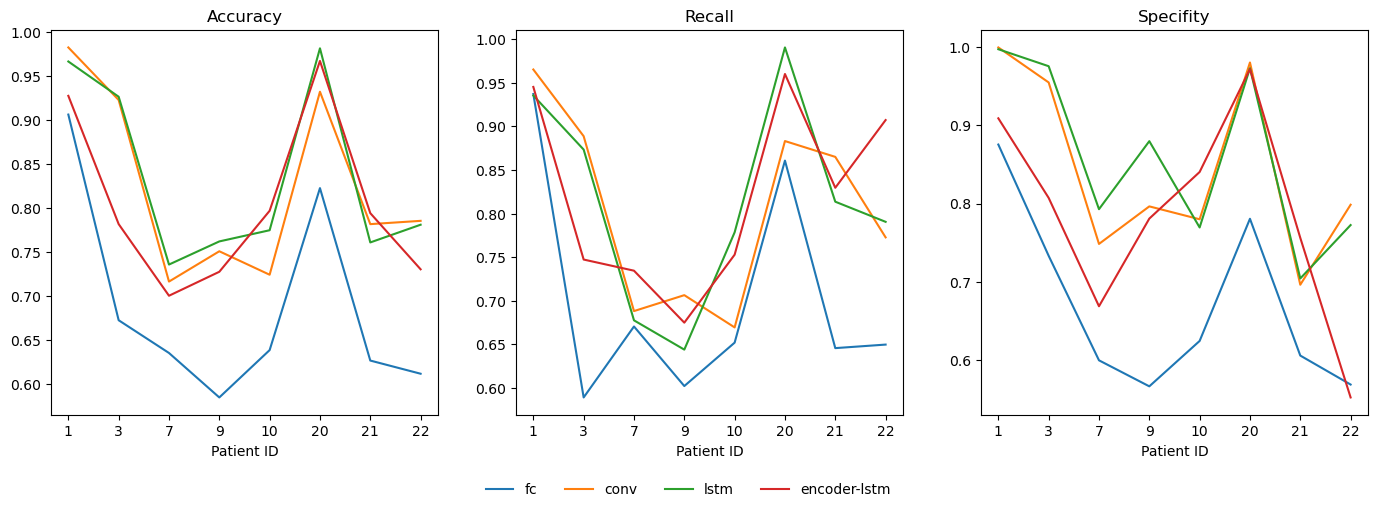

In [382]:
models_r1 = ['fc', 'conv', 'lstm', 'encoder-lstm']
plot_models(models_r1, ['acc', 'recall', 'specifity'], 'results_media/r1.jpg')

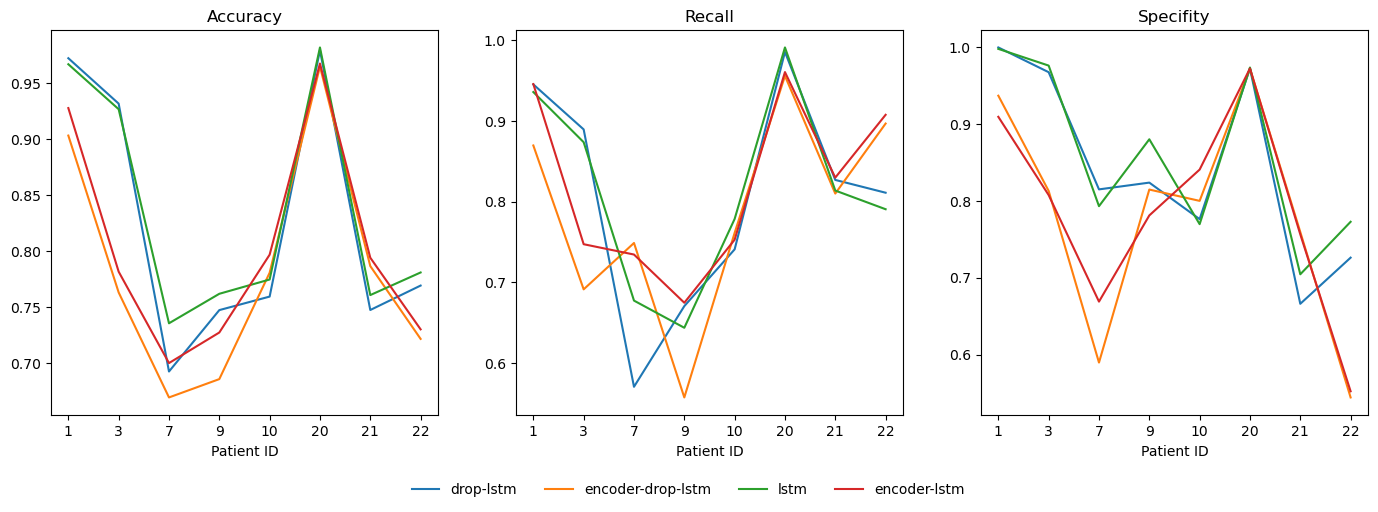

In [384]:
models_r2 = ['drop-lstm', 'encoder-drop-lstm', 'lstm', 'encoder-lstm']
plot_models(models_r2, ['acc', 'recall', 'specifity'], 'results_media/r2.jpg')